<h1> Features Noticias </h1>

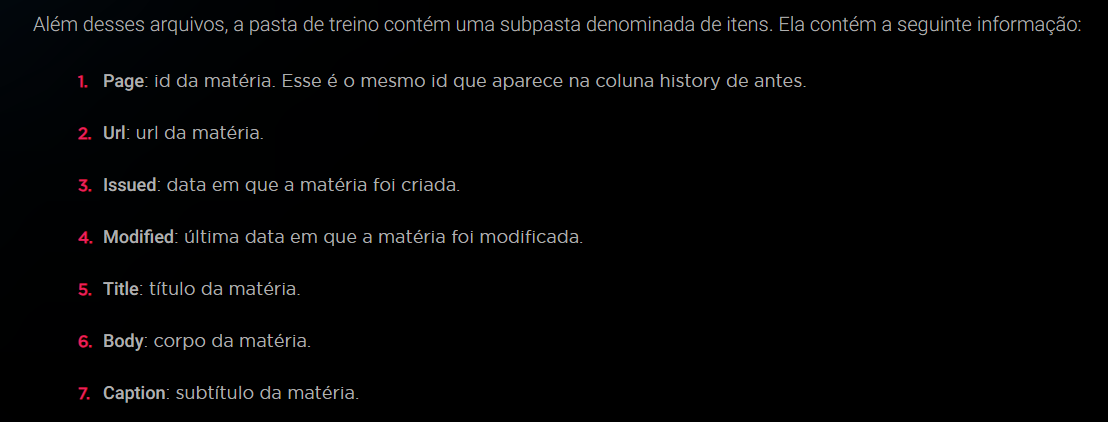

In [2]:
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
# Path handling
os.chdir("c:/Users/gufer/OneDrive/Documentos/FIAP/Fase_05/ML_Engineer_Datathon/")

In [4]:
# Itens
itens_df = pd.DataFrame()

for x in range(1,4):
    item_path = f"data/challenge-webmedia-e-globo-2023/itens/itens/itens-parte{x}.csv"
    df = pd.read_csv(item_path)
    itens_df = pd.concat([itens_df,df])
    
itens_df

,page,url,issued,modified,title,body,caption
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic..."
...,...,...,...,...,...,...,...
55598,943d6ee8-9daa-4a26-9e42-763339bedba6,http://g1.globo.com/sp/campinas-regiao/concurs...,2022-05-09 10:13:37+00:00,2022-05-09 10:13:41+00:00,"Região de Campinas inicia semana com 1,9 mil v...","Região de Campinas soma 1,9 mil vagas distribu...",Americana (SP) é o município com maior número ...
55599,d21c1bfc-6a90-4e2d-8c4c-ff1daee1b4f2,http://g1.globo.com/especial-publicitario/vae/...,2019-11-08 20:46:46+00:00,2019-11-08 20:46:47+00:00,"Em 10 passos, saiba o que você precisa fazer p...",Empreendimentos nascem de uma ideia e são movi...,Entenda cada etapa do processo para ter o seu ...
55600,abc5ecd9-81e1-40cf-b706-0b5fa7bea3be,http://g1.globo.com/sp/campinas-regiao/terra-d...,2018-07-10 20:55:41+00:00,2018-07-11 11:03:20+00:00,Ratão-do-banhado é roedor adaptado para viver ...,Ratão-do-banhado é confundido com a capivara\n...,"Com um metro de comprimento e nove quilos, mam..."
55601,a7cf134e-0bb0-4363-9224-4d68cf8c7a53,http://g1.globo.com/mg/zona-da-mata/noticia/20...,2018-07-18 21:30:48+00:00,2018-07-18 21:30:50+00:00,Começa nesta quarta-feira em Juiz de Fora o XV...,O XV Congresso Regional Sudeste da Federação d...,Evento conta com apresentações de 18 coros até...


In [5]:
# Downloading additional resources

# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('punkt_tab') 

In [6]:

stop_words = set(stopwords.words('portuguese'))
lemmatizer = WordNetLemmatizer()
df=itens_df

In [9]:
from joblib import Parallel, delayed

def preprocess_text(text):
    # Remover caracteres especiais e URLs
    text = re.sub(r"http\S+|www\S+|[^a-zA-ZÀ-ÿ\s]", "", text)
    # Remove pontuações
    text = re.sub(r'[^\w\s]', '', text) 
    # Remove números 
    text = re.sub(r'\d+', '', text)      
    # Converter para minúsculas
    text = text.lower()
    # Remover stopwords e aplicar lematização
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Paralelizando com joblib
df['cleaned_body'] = Parallel(n_jobs=4)(delayed(preprocess_text)(text) for text in df['body'])
df['cleaned_body']

#TODO: fazer o mesmo com outras colunas de texto

0        após audiência custódia justiça amazona decret...
1        vista aérea santarém ádrio denner ad produções...
2        novo vídeo mostra assassino shinzo abe atirou ...
3        relator stf fachin vota contra marco temporal ...
4        após pedido vista tempo análise processo minis...
                               ...                        
55598    região campinas soma mil vagas distribuídas pa...
55599    empreendimentos nascem ideia movidos paixão ca...
55600    ratãodobanhado confundido capivara giselda per...
55601    xv congresso regional sudeste federação menino...
55602    gul makai filme sobre ganhadora nobel paz mala...
Name: cleaned_body, Length: 255603, dtype: object

In [10]:
from rake_nltk import Rake

# Inicializar o RAKE (extrator de palavras-chave)
rake = Rake(language='portuguese', stopwords=stop_words)

def extract_theme(text):
    rake.extract_keywords_from_text(text)
    return rake.get_ranked_phrases()[0]  # Pega a palavra-chave mais relevante

df_sample = df.head(10)
df_sample['theme'] = df_sample['cleaned_body'].apply(extract_theme)
print(df_sample['theme'])


0    após audiência custódia justiça amazona decret...
1    vista aérea santarém ádrio denner ad produções...
2    novo vídeo mostra assassino shinzo abe atirou ...
3    relator stf fachin vota contra marco temporal ...
4    após pedido vista tempo análise processo minis...
5    marco temporal sobre terras indígenas entenda ...
6    shannen doherty barrados baile compartilha his...
7    hitei cornershop hit complicado mistura indian...
8    conheça equipe completa diretorgeral jornalism...
9    terceiro suspeito participar assassinatos brun...
Name: theme, dtype: object


C:\Users\gufer\AppData\Local\Temp\ipykernel_1556\19535927.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['theme'] = df_sample['cleaned_body'].apply(extract_theme)


In [ ]:
#Recência é um atributo da notícia que vai subir ou descer a nota dela no algoritmo de recomendação

# Para recomendar uma notícia, considerar a data de publicação (não sei se a data de modificação é uma boa) e a pertinência do tema. 
# Pensei em usar um word2vec e fazer com base em clusters de um kmeans.

# Score de recência discreto (notícia velha, muito velha, atual, etc.) ou contínuo (tempo até a data de hoje)?